

*   **Rishabh Patil**
*   **SAP : 60009200056**
*   **Div : K/K2**





In [ ]:
import numpy as np, random, pandas as pd, matplotlib.pyplot as plt

Creating Path

In [ ]:
def createPath(cityList):
    return random.sample(cityList, len(cityList))

Creating initial population

In [ ]:
def initialPop(size, cityList):
    population = []
    for i in range(0, size):
        population.append(createPath(cityList))
    return population

Class for nodes

In [ ]:
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, node):
        return ((self.x-node.x)**2+(self.y-node.y)**2)**0.5
    
    def __repr__(self):
        return f"({self.x},{self.y})"

Class for calculating fitness

In [ ]:
class Fitness:
    def __init__(self, path):
        self.path = path
        self.distance = 0
        self.fitness = 0.0
    
    def pathDistance(self):
        if self.distance==0:
            pathDistance = 0
            for i in range(0, len(self.path)):
                initialCity = self.path[i]
                if i+1<len(self.path):
                    finalCity = self.path[i+1]
                else:
                    finalCity = self.path[0]
                pathDistance+=initialCity.distance(finalCity)
            self.distance = pathDistance
        return self.distance
    
    def fitness_val(self):
        if self.fitness==0:
            self.fitness = 1/float(self.pathDistance())
        return self.fitness

Determining fitness and selecting best

In [ ]:
def bestFitness(population):
    ans = {}
    for i in range(0,len(population)):
        ans[i] = Fitness(population[i]).fitness_val()
    return sorted(ans.items(), key=lambda x:x[1], reverse = True)

Roulette wheel

In [ ]:
def selection(popRanked, size):
    ans = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = df.cum_sum*100/df.Fitness.sum()
    for i in range(0, size):
        ans.append(popRanked[i][0])
    for i in range(0, len(popRanked)-size):
        select = 100*random.random()
        for i in range(0, len(popRanked)):
            if select<=df.iat[i,3]:
                ans.append(popRanked[i][0])
                break
    return ans

In [ ]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

Crossover

In [ ]:
def crossover(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)
    for i in range(startGene, endGene):
        childP1.append(parent1[i])
    childP2 = [item for item in parent2 if item not in childP1]
    child = childP1 + childP2
    return child

In [ ]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))
    for i in range(0,eliteSize):
        children.append(matingpool[i])
    for i in range(0, length):
        child = crossover(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

Mutate

In [ ]:

def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            city1 = individual[swapped]
            city2 = individual[swapWith]
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [ ]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

Driver Code

In [ ]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = bestFitness(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [ ]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPop(popSize, population)
    print("Initial distance: " + str(1 / bestFitness(pop)[0][1]))
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    print("Final distance: " + str(1 / bestFitness(pop)[0][1]))
    bestRouteIndex = bestFitness(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

Plotting

In [ ]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPop(popSize, population)
    progress = []
    progress.append(1 / bestFitness(pop)[0][1])
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / bestFitness(pop)[0][1])
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

1. For 20 cities 

In [ ]:
cityList = []
for i in range(0,20):
    cityList.append(Node(x=int(random.random() * 200), y=int(random.random() * 200)))

In [ ]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 446.6484320307101
Final distance: 446.6484320307101


[(156,12), (13,78), (71,157), (143,114), (155,103)]

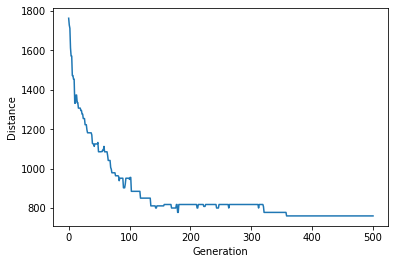

In [ ]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

For 5,10 and 40 cities

In [ ]:
cityList = []
for i in range(0,5):
    cityList.append(Node(x=int(random.random() * 200), y=int(random.random() * 200)))

In [ ]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 525.115510279991
Final distance: 525.115510279991


[(192,170), (163,33), (124,72), (38,46), (42,131)]

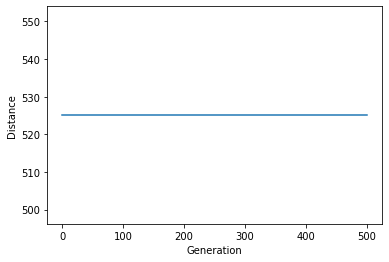

In [ ]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

In [ ]:
cityList = []
for i in range(0,10):
    cityList.append(Node(x=int(random.random() * 200), y=int(random.random() * 200)))

In [ ]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 710.6857215646991
Final distance: 507.38123191034714


[(197,197),
 (154,117),
 (140,123),
 (112,72),
 (47,45),
 (23,43),
 (36,62),
 (73,119),
 (94,146),
 (136,192)]

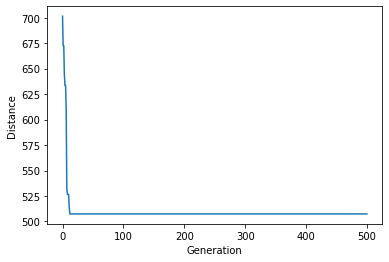

In [ ]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

In [ ]:
cityList = []
for i in range(0,40):
    cityList.append(Node(x=int(random.random() * 200), y=int(random.random() * 200)))

In [ ]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 2772.3623539549417
Final distance: 1396.6060239539956


[(118,89),
 (128,99),
 (94,122),
 (77,142),
 (55,137),
 (53,136),
 (54,112),
 (55,98),
 (74,87),
 (99,34),
 (126,41),
 (126,41),
 (132,54),
 (139,66),
 (167,115),
 (155,116),
 (147,140),
 (130,174),
 (188,65),
 (197,67),
 (175,94),
 (140,52),
 (139,24),
 (141,28),
 (125,95),
 (109,92),
 (108,149),
 (111,139),
 (102,123),
 (115,126),
 (4,84),
 (0,34),
 (3,1),
 (33,48),
 (25,63),
 (89,28),
 (99,42),
 (124,69),
 (120,66),
 (146,14)]

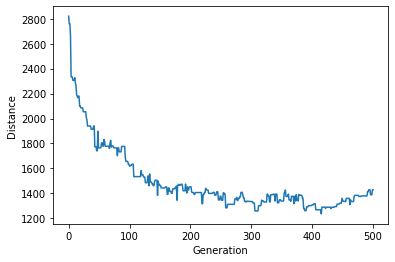

In [ ]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)